<a href="https://colab.research.google.com/github/Nsad9579/Clinical-Projects/blob/main/heartAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: understand the data

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/16325569497737558.csv")

In [4]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
#1. null
#2. dplicates
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [11]:
#first let's see which columns are numerical and which are not
df._get_numeric_data().columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [12]:
#scanning for categorical data
x=df.nunique()
categorical_col=[column for column in df.columns if x[column]< 10 and column !='output' ]
categorical_col

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# take a deeper look at data

first draw some plots to see their distributions

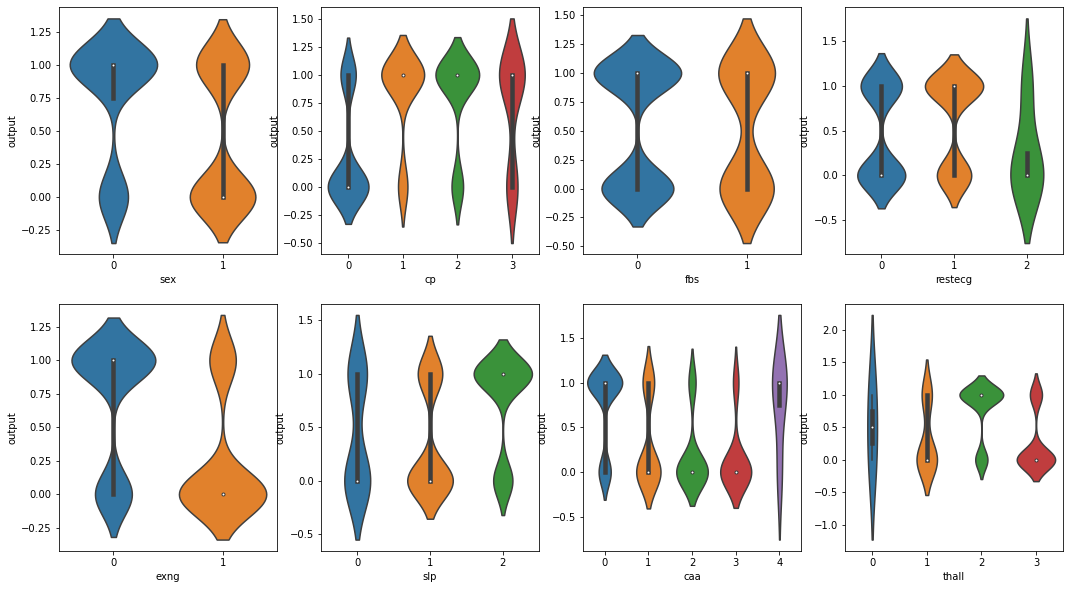

In [13]:
#for categorical data
fig, axes = plt.subplots(2,4,figsize=(18,10))
sns.violinplot(ax=axes[0, 0],x=df["sex"], y=df["output"])
sns.violinplot(ax=axes[0, 1],x=df["cp"], y=df["output"])
sns.violinplot(ax=axes[0, 2],x=df["fbs"], y=df["output"])
sns.violinplot(ax=axes[0, 3],x=df["restecg"], y=df["output"])
sns.violinplot(ax=axes[1, 0],x=df["exng"], y=df["output"])
sns.violinplot(ax=axes[1, 1],x=df["slp"], y=df["output"])
sns.violinplot(ax=axes[1, 2],x=df["caa"], y=df["output"])
sns.violinplot(ax=axes[1, 3],x=df["thall"], y=df["output"])

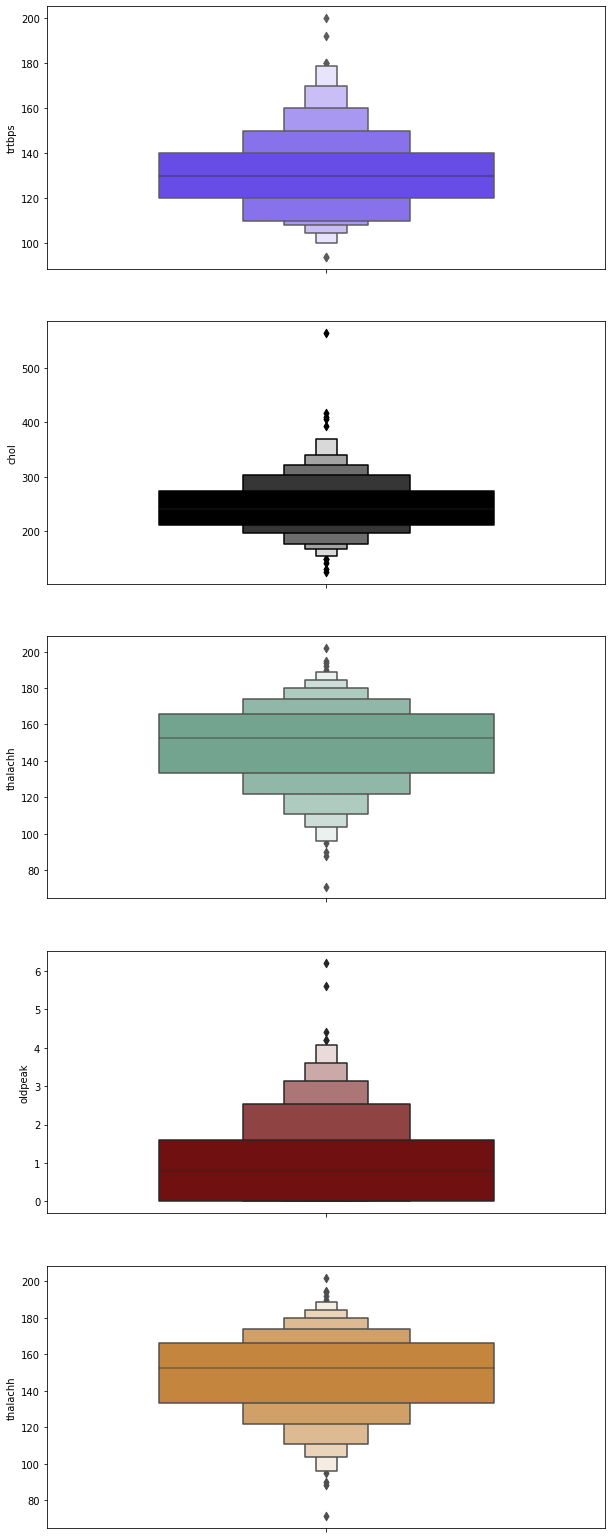

In [14]:
#for numeric data; their distributions
fig, axes = plt.subplots(5,1,figsize=(10,28))
sns.boxenplot(ax=axes[0],y=df['trtbps'],palette=["#5833ff"],width=0.6)
sns.boxenplot(ax=axes[1],y=df['chol'],palette=["#000000"],width=0.6)
sns.boxenplot(ax=axes[2],y=df['thalachh'],palette=["#6aac90"],width=0.6)
sns.boxenplot(ax=axes[3],y=df['oldpeak'],palette=["#800000"],width=0.6)
sns.boxenplot(ax=axes[4],y=df['thalachh'],palette=["#da8829"],width=0.6)


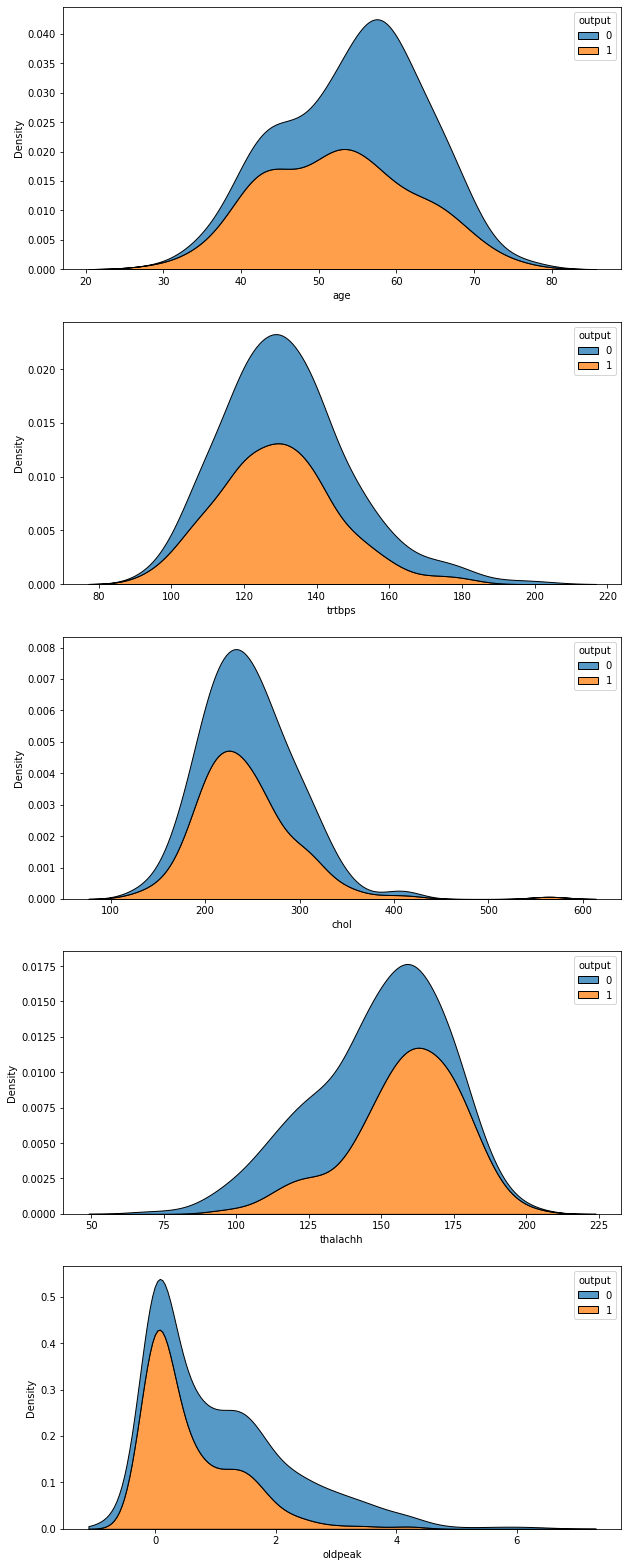

In [15]:
#for numeric data; their distributions
fig, axes = plt.subplots(5,1,figsize=(10,28))
sns.kdeplot(ax=axes[0],x=df['age'], hue=df["output"], multiple="stack")
sns.kdeplot(ax=axes[1],x=df['trtbps'], hue=df["output"], multiple="stack")
sns.kdeplot(ax=axes[2],x=df['chol'], hue=df["output"], multiple="stack")
sns.kdeplot(ax=axes[3],x=df['thalachh'], hue=df["output"], multiple="stack")
sns.kdeplot(ax=axes[4],x=df['oldpeak'], hue=df["output"], multiple="stack")

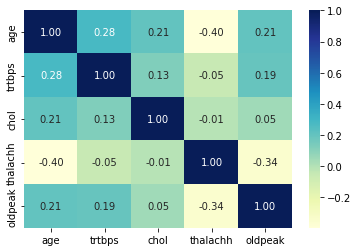

In [16]:
#Correlation matrix of continuous features
numeric_cols=[column for column in df.columns if x[column]> 10 ]
df_corr = df[numeric_cols].corr().transpose()
ax = sns.heatmap(df_corr,annot=True,cmap='YlGnBu',fmt=".2f")

# ***So ...***

so up to now we found sth about our data:


1.   No nan value
2.   According to the heatmap ;no apparent linear correlation
3.   People with cp = 2 , caa = 0 , sex = 1 , thall = 2 ,and exng = 0    have higher chances of heart attack.





In [17]:
# let's start our JOBBBB!!!!

# step 2: data preprocessing 

In [18]:
# make a copy of df
from sklearn.preprocessing import RobustScaler
df1 = df
# for categorical columns use one hot encoding 
df1 = pd.get_dummies(df1, columns =categorical_col, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# for numeric columns use Scaling
scaler = RobustScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
print("The first 5 rows of X are")
X.describe()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-0.083036,0.080132,0.094118,-0.089480,0.151904,0.682119,0.165563,0.284768,0.076159,0.149007,...,0.327815,0.463576,0.466887,0.215232,0.125828,0.066225,0.013245,0.059603,0.546358,0.387417
std,0.695998,0.878170,0.811819,0.699344,0.725908,0.466426,0.372305,0.452053,0.265693,0.356686,...,0.470196,0.499499,0.499730,0.411665,0.332206,0.249088,0.114512,0.237142,0.498673,0.487969
min,-2.038462,-1.800000,-1.796078,-2.488550,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.576923,-0.500000,-0.462745,-0.587786,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.423077,0.500000,0.537255,0.412214,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.653846,3.500000,5.074510,1.511450,3.375000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# step 3: Modeling 

In [20]:


# Models
import torch
import torch.nn as nn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [21]:
#SVM 
from sklearn.svm import SVC
Calssifier = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

y_pred = Calssifier.predict(X_test)
print("accuracy score for SVM : ", accuracy_score(y_test, y_pred))

accuracy score for SVM :  0.8360655737704918


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV

svm = SVC()
parameters = {"C":np.arange(1,20,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.051,0.056,0.1,0.5,1,5,0.08,0.18]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train["output"])
print(searcher.best_score_, searcher.best_params_)
y_pred = searcher.predict(X_test)
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

0.8586734693877551 {'C': 5, 'gamma': 0.05}
The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

Reg = LogisticRegression()
Reg.fit(X_train, y_train["output"])
y_pred_proba = Reg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='binary'))

0.9016393442622951
0.9032258064516129


In [27]:
#According to F1 score I think it really worked well enough to be proud of it:) 

### Receiver Operating Characteristic

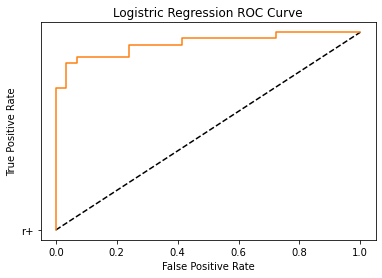

In [29]:
y_pred_prob = Reg.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

In [ ]:
# area under the curve is fair so I think it's not over fitted!